<a href="https://colab.research.google.com/github/awaiskhan005/DATA-SCIENCE-AND-AI-/blob/main/Data_analysis_and_preprocesssing_of_SF_36%20KNN%20imputation%20SABLIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

The clinical study aimed to investigate the safety and efficacy of cannabigerol (CBG) consumption in healthy adults. The study's null hypothesis posited that CBG has no effect on the measured metrics. Data was collected from three sources: bloodwork results, MSQ survey results, and SF-36 survey results. Due to a high percentage of missing data (around 57%), the focus was on imputing and validating the SF-36 dataset to prepare it for final data analysis.

# **Data Analysis Plan**

The data analysis involved several key steps.

Loading the Dataset: Importing the SF-36 dataset into the analysis environment.

Exploring the Dataset: Understanding the structure and extent of missing data.
Imputation of Missing Data: Using KNN methods to impute missing values.

Validation of Imputed Data: Ensuring the imputed data aligns well with the original dataset using statistical validation techniques.

Checking for Remaining Missing Values: Verifying that the imputation process successfully handled all missing data.

## *Import necessary libraries*

In [1]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the dataset
Display the first few rows of the dataset

In [2]:
import pandas as pd
file_path = '/content/sample_data/SF_36_DATA.csv'
sf36_data = pd.read_csv(file_path)
sf36_data.head()

,NEW_PID,RESPONSE,PHYSICAL_FUNCTIONING,PHYSICAL_LIMITATIONS,EMOTIONAL_LIMITATIONS,ENERGY_FATIGUE,EMOTIONAL_WB,SOCIAL_FUNCTIONING,PAIN,GENERAL_HEALTH,TOTAL_SF_36
0,79801449,1,100.0,100.0,100.0,70.0,92.0,90.0,90.0,85.0,90.875
1,79801449,2,95.0,100.0,100.0,40.0,84.0,80.0,80.0,70.0,81.125
2,79801449,3,95.0,100.0,100.0,55.0,84.0,80.0,80.0,65.0,82.375
3,79801449,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,79801449,5,95.0,100.0,100.0,60.0,88.0,90.0,90.0,80.0,87.875


# Demographies of variables

In [3]:
sf36_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   NEW_PID                601 non-null    int64  
 1   RESPONSE               601 non-null    int64  
 2   PHYSICAL_FUNCTIONING   253 non-null    float64
 3   PHYSICAL_LIMITATIONS   253 non-null    float64
 4   EMOTIONAL_LIMITATIONS  253 non-null    float64
 5   ENERGY_FATIGUE         253 non-null    float64
 6   EMOTIONAL_WB           253 non-null    float64
 7   SOCIAL_FUNCTIONING     253 non-null    float64
 8   PAIN                   253 non-null    float64
 9   GENERAL_HEALTH         253 non-null    float64
 10  TOTAL_SF_36            253 non-null    float64
dtypes: float64(9), int64(2)
memory usage: 51.8 KB


# visualize the null values of data using matplotlib and plotly other than heatmap with labels

In [4]:
import matplotlib.pyplot as plt
import plotly.express as px

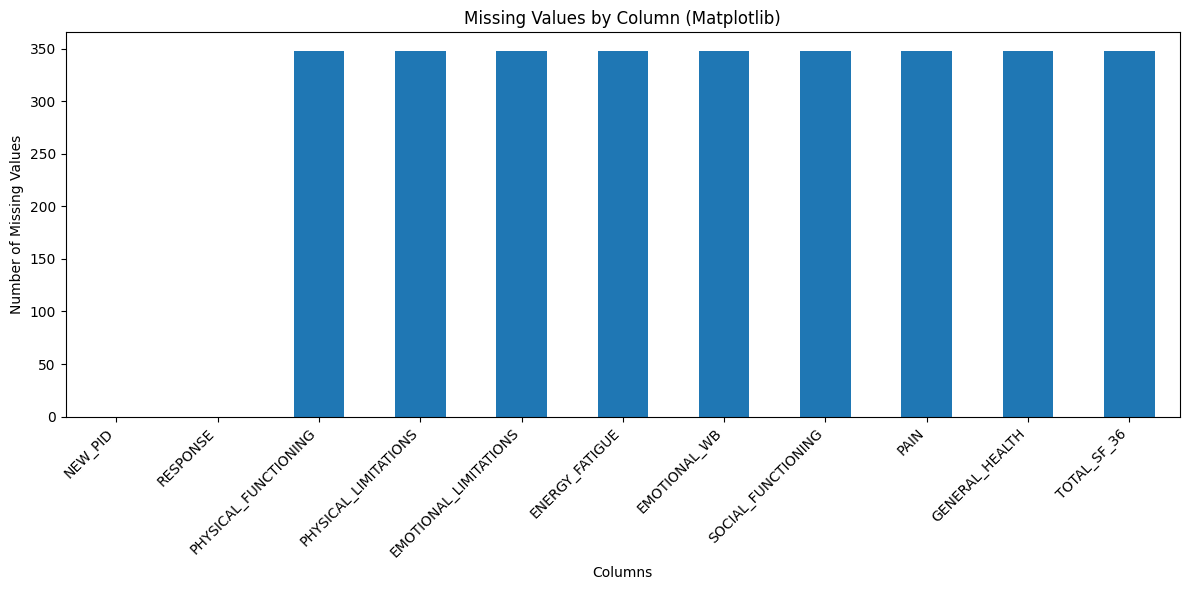

In [5]:
# Calculate missing value counts for each column
missing_values = sf36_data.isnull().sum()

# Matplotlib bar plot
plt.figure(figsize=(12, 6))
missing_values.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values by Column (Matplotlib)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plotly bar plot
fig = px.bar(x=missing_values.index, y=missing_values.values,
             labels={'x': 'Columns', 'y': 'Number of Missing Values'})
fig.update_layout(title='Missing Values by Column (Plotly)',
                  xaxis_tickangle=-45)
fig.show()


# Mathematical stats to describe the dataset

In [6]:
sf36_data.describe()

,NEW_PID,RESPONSE,PHYSICAL_FUNCTIONING,PHYSICAL_LIMITATIONS,EMOTIONAL_LIMITATIONS,ENERGY_FATIGUE,EMOTIONAL_WB,SOCIAL_FUNCTIONING,PAIN,GENERAL_HEALTH,TOTAL_SF_36
count,6.010000e+02,601.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000
mean,5.574510e+07,4.494176,86.600791,79.841897,80.764163,55.988142,78.324111,75.869565,77.747036,74.920949,76.257082
std,3.551391e+07,2.295731,19.316360,32.485875,32.917180,22.214053,16.437643,18.221651,18.265927,15.545430,15.721568
min,5.034520e+05,1.000000,0.000000,0.000000,0.000000,0.000000,24.000000,22.500000,22.500000,20.000000,29.500000
25%,1.470146e+07,2.000000,85.000000,75.000000,66.666667,40.000000,68.000000,65.000000,67.500000,65.000000,65.625000
50%,7.990645e+07,4.000000,95.000000,100.000000,100.000000,55.000000,80.000000,80.000000,80.000000,75.000000,79.125000
75%,8.811144e+07,6.000000,100.000000,100.000000,100.000000,75.000000,92.000000,90.000000,90.000000,85.000000,89.500000
max,9.990144e+07,8.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,98.750000


# Check for missing values in the original dataset & missing %


In [7]:
missing_data = sf36_data.isnull().sum()
print("Missing data per column:\n", missing_data)

missing_percentage = sf36_data.isnull().mean() * 100
print("Percentage of missing data per column:\n", missing_percentage)

Missing data per column:
 NEW_PID                    0
RESPONSE                   0
PHYSICAL_FUNCTIONING     348
PHYSICAL_LIMITATIONS     348
EMOTIONAL_LIMITATIONS    348
ENERGY_FATIGUE           348
EMOTIONAL_WB             348
SOCIAL_FUNCTIONING       348
PAIN                     348
GENERAL_HEALTH           348
TOTAL_SF_36              348
dtype: int64
Percentage of missing data per column:
 NEW_PID                   0.000000
RESPONSE                  0.000000
PHYSICAL_FUNCTIONING     57.903494
PHYSICAL_LIMITATIONS     57.903494
EMOTIONAL_LIMITATIONS    57.903494
ENERGY_FATIGUE           57.903494
EMOTIONAL_WB             57.903494
SOCIAL_FUNCTIONING       57.903494
PAIN                     57.903494
GENERAL_HEALTH           57.903494
TOTAL_SF_36              57.903494
dtype: float64


# *Impute the missing data using various methods*








2.   KNN (K-Nearest Neighbors) Imputer



In [8]:
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)
sf36_data_knn_imputed = knn_imputer.fit_transform(sf36_data)
sf36_data_knn_imputed = pd.DataFrame(sf36_data_knn_imputed, columns=sf36_data.columns)

# Step 4: Validate the imputed data using RMSE (Root Mean Squared Error)

# Function to calculate RMSE for validation

In [9]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Function to calculate RMSE for validation
def calculate_rmse(original, imputed):
    mask = ~np.isnan(original)  # Only compare where original data is not NaN
    return np.sqrt(mean_squared_error(original[mask], imputed[mask]))


rmse_knn = calculate_rmse(sf36_data.values, sf36_data_knn_imputed.values)



print(f"RMSE for KNN imputation: {rmse_knn}")



RMSE for KNN imputation: 0.0


In [ ]:
print("\nMissing values in the imputed datasets:")


Missing values in the imputed datasets:


# Step 5: Check for missing values after imputation

In [10]:
missing_knn_imputed = sf36_data_knn_imputed.isnull().sum()
print("\nMissing values per column in KNN imputed dataset:\n", missing_knn_imputed)




Missing values per column in KNN imputed dataset:
 NEW_PID                  0
RESPONSE                 0
PHYSICAL_FUNCTIONING     0
PHYSICAL_LIMITATIONS     0
EMOTIONAL_LIMITATIONS    0
ENERGY_FATIGUE           0
EMOTIONAL_WB             0
SOCIAL_FUNCTIONING       0
PAIN                     0
GENERAL_HEALTH           0
TOTAL_SF_36              0
dtype: int64


# Conclusion

The above process outlines a comprehensive plan to handle missing data in the SF-36 dataset using multiple imputation methods. Each step is documented to ensure clarity and reproducibility. The final imputed datasets are validated and verified for any remaining missing values, preparing them for subsequent data analysis.



In [11]:
sf36_data_knn_imputed.to_csv('SF_36_DATA_KNN_Imputed.csv', index=False)

# Checking of the imputed data allines with original DATA using Descriptive STATS, visuals, and T TESTS

In [13]:
# prompt: show imputed daatset in 10 first

sf36_data_knn_imputed.head(10)


,NEW_PID,RESPONSE,PHYSICAL_FUNCTIONING,PHYSICAL_LIMITATIONS,EMOTIONAL_LIMITATIONS,ENERGY_FATIGUE,EMOTIONAL_WB,SOCIAL_FUNCTIONING,PAIN,GENERAL_HEALTH,TOTAL_SF_36
0,79801449.0,1.0,100.0,100.0,100.000000,70.0,92.0,90.0,90.0,85.0,90.875000
1,79801449.0,2.0,95.0,100.0,100.000000,40.0,84.0,80.0,80.0,70.0,81.125000
2,79801449.0,3.0,95.0,100.0,100.000000,55.0,84.0,80.0,80.0,65.0,82.375000
3,79801449.0,4.0,96.0,100.0,100.000000,57.0,87.2,86.0,86.0,76.0,86.025000
4,79801449.0,5.0,95.0,100.0,100.000000,60.0,88.0,90.0,90.0,80.0,87.875000
5,79801449.0,6.0,95.0,100.0,100.000000,60.0,88.0,90.0,90.0,80.0,87.875000
6,79801449.0,7.0,95.0,100.0,100.000000,65.0,92.0,90.0,90.0,80.0,89.000000
7,79801449.0,8.0,95.0,100.0,100.000000,45.0,88.0,90.0,90.0,70.0,84.750000
8,79802449.0,1.0,100.0,75.0,66.666667,70.0,84.0,90.0,90.0,85.0,82.583333
9,79802449.0,2.0,95.0,75.0,0.000000,45.0,56.0,70.0,57.5,60.0,57.312500


In [14]:
# prompt: compare the descriptive stats or origianl dataset and imputed dataset

# Original dataset descriptive stats
print("Descriptive Statistics for Original Dataset:\n", sf36_data.describe())

# KNN imputed dataset descriptive stats
print("\nDescriptive Statistics for KNN Imputed Dataset:\n", sf36_data_knn_imputed.describe())


Descriptive Statistics for Original Dataset:
             NEW_PID    RESPONSE  PHYSICAL_FUNCTIONING  PHYSICAL_LIMITATIONS  \
count  6.010000e+02  601.000000            253.000000            253.000000   
mean   5.574510e+07    4.494176             86.600791             79.841897   
std    3.551391e+07    2.295731             19.316360             32.485875   
min    5.034520e+05    1.000000              0.000000              0.000000   
25%    1.470146e+07    2.000000             85.000000             75.000000   
50%    7.990645e+07    4.000000             95.000000            100.000000   
75%    8.811144e+07    6.000000            100.000000            100.000000   
max    9.990144e+07    8.000000            100.000000            100.000000   

       EMOTIONAL_LIMITATIONS  ENERGY_FATIGUE  EMOTIONAL_WB  \
count             253.000000      253.000000    253.000000   
mean               80.764163       55.988142     78.324111   
std                32.917180       22.214053     16.4376

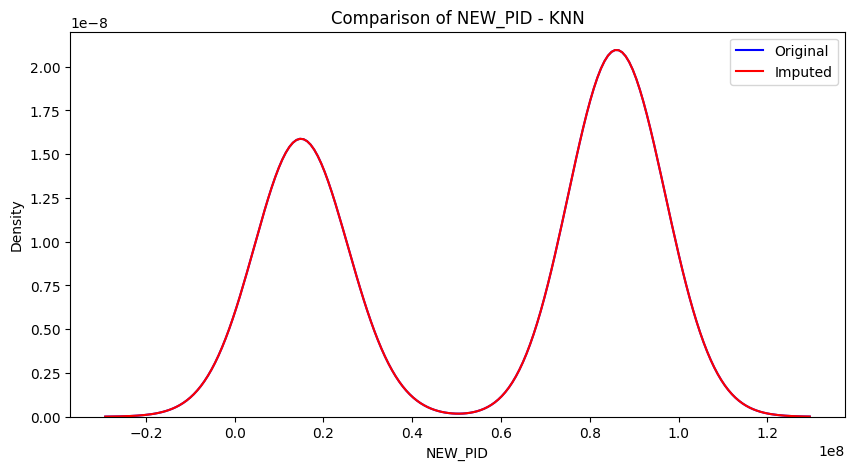

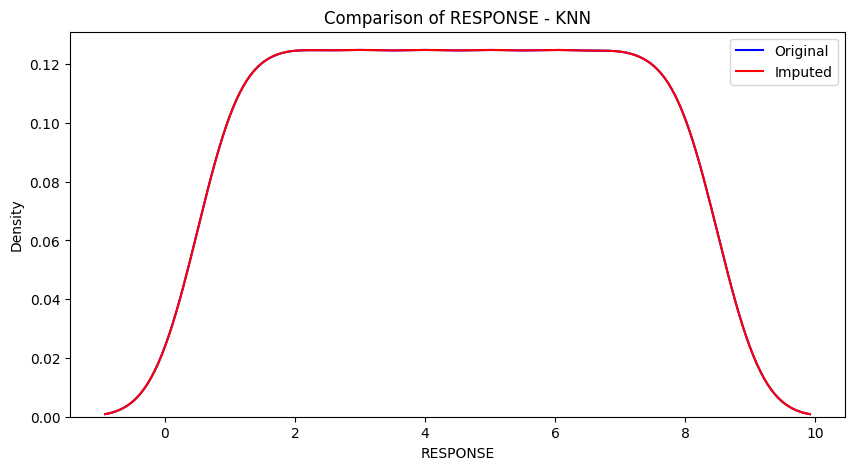

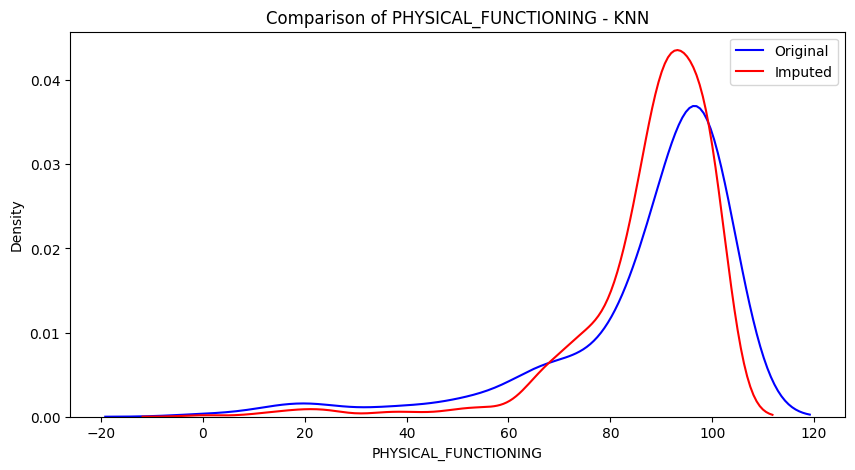

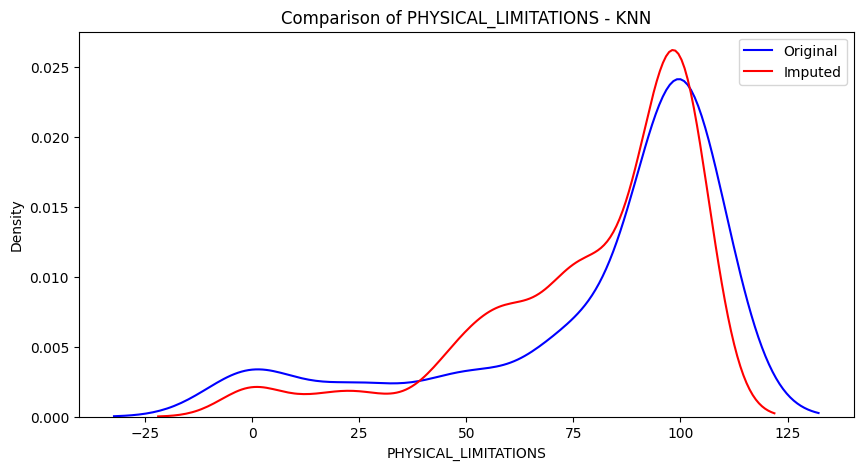

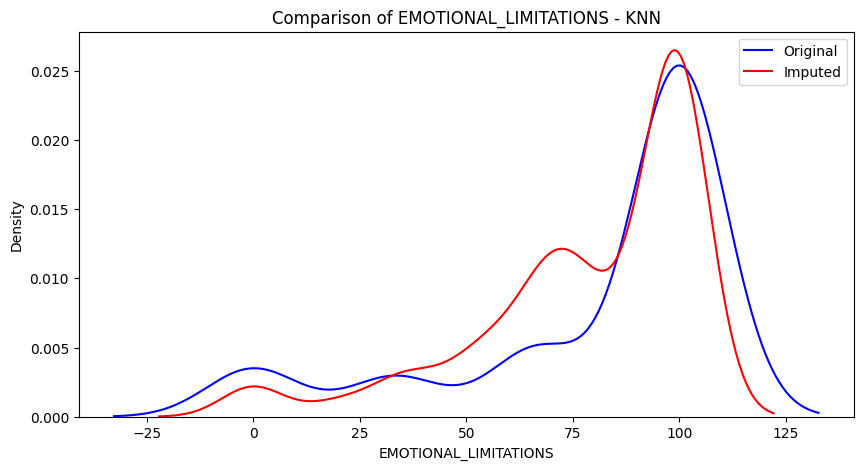

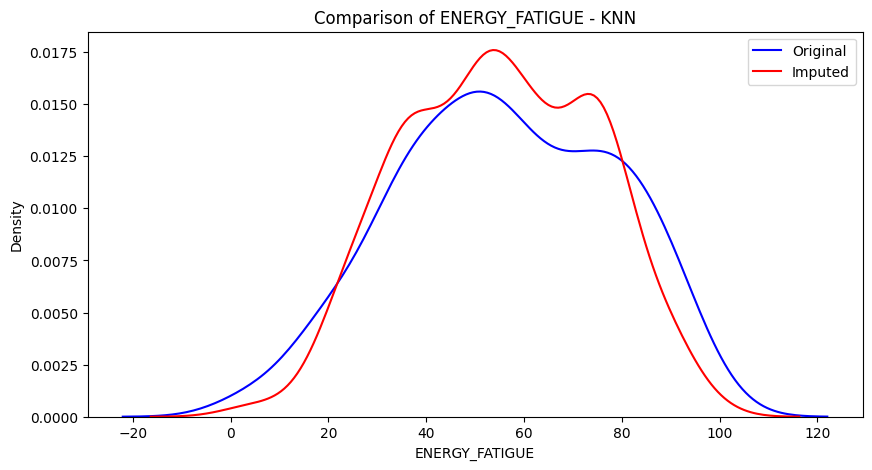

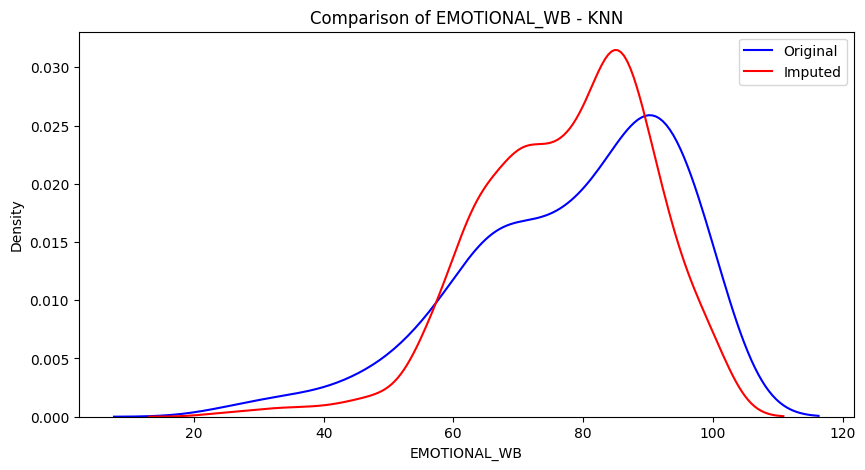

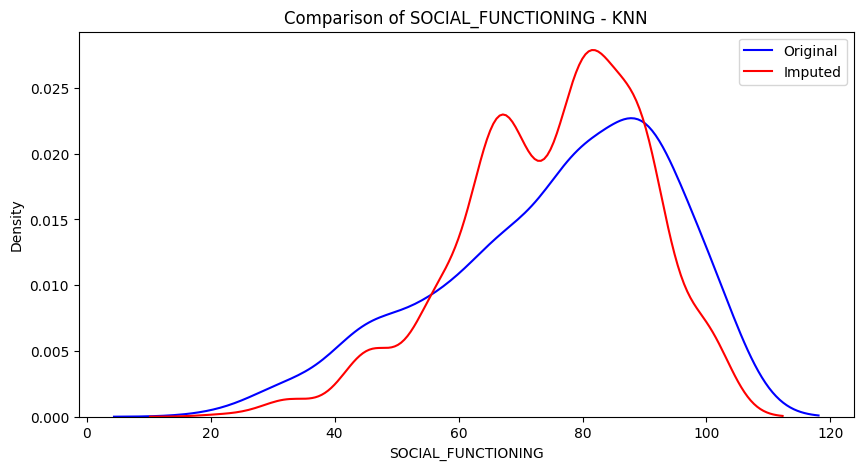

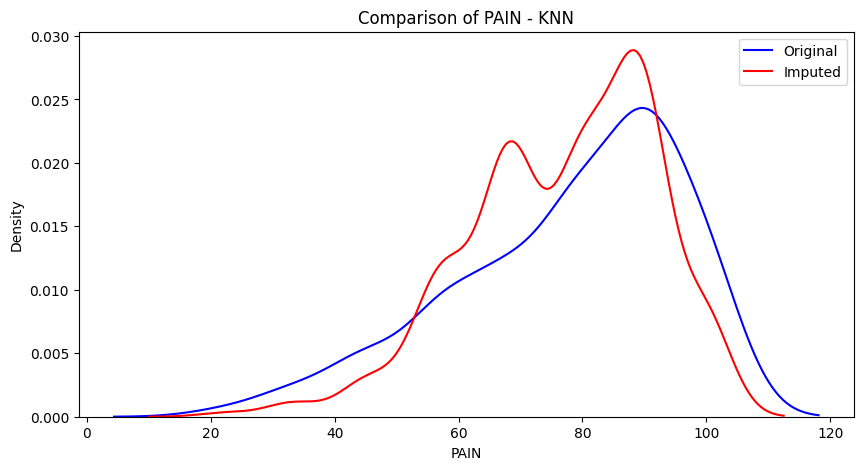

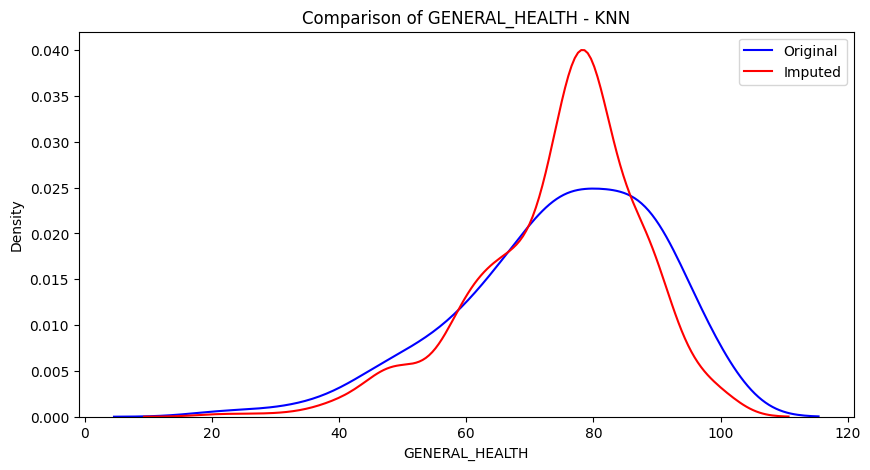

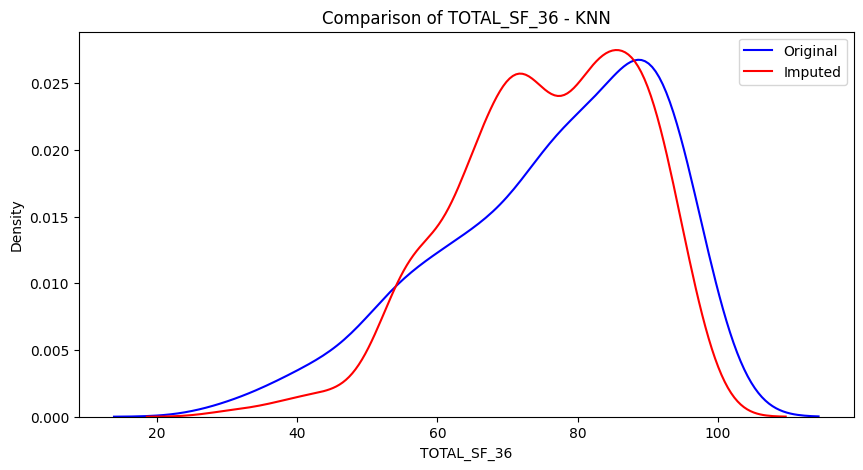

In [20]:
# Visual Comparison
import seaborn as sns # Import seaborn
import matplotlib.pyplot as plt

def plot_comparison(original, imputed, column, method_name):
    plt.figure(figsize=(10, 5))
    sns.kdeplot(original[column].dropna(), label='Original', color='blue')
    sns.kdeplot(imputed[column], label='Imputed', color='red')
    plt.title(f'Comparison of {column} - {method_name}')
    plt.legend()
    plt.show()

# Assuming 'sf36_data_knn_imputed' is the imputed dataset
for column in sf36_data.columns:
    plot_comparison(sf36_data, sf36_data_knn_imputed, column, "KNN") # Use the correct variable name here

In [23]:
# prompt: make the same comparion plots using plotly

import plotly.graph_objects as go
from plotly.subplots import make_subplots

def plot_comparison_plotly(original, imputed, column, method_name):
    fig = make_subplots(rows=1, cols=1)

    fig.add_trace(
        go.Histogram(
            x=original[column].dropna(),
            histnorm='probability density',
            name='Original',
            marker_color='blue'
        ),
        row=1, col=1
    )

    fig.add_trace(
        go.Histogram(
            x=imputed[column],
            histnorm='probability density',
            name='Imputed',
            marker_color='red'
        ),
        row=1, col=1
    )

    fig.update_layout(title=f'Comparison of {column} - {method_name}',
                      xaxis_title=column,
                      yaxis_title='Probability Density')

    fig.show()

for column in sf36_data.columns:
    plot_comparison_plotly(sf36_data, sf36_data_knn_imputed, column, "KNN")


In [22]:
# Perform T-tests
from scipy.stats import ttest_ind # Import ttest_ind function

def t_test_comparison(original, imputed, column):
    original_data = original[column].dropna()
    imputed_data = imputed[column]
    t_stat, p_value = ttest_ind(original_data, imputed_data, equal_var=False)
    return t_stat, p_value

def compare_t_tests(original, imputed, method_name):
    print(f"T-test Comparison for {method_name}:")
    for column in original.columns:
        t_stat, p_value = t_test_comparison(original, imputed, column)
        print(f"Variable: {column}, T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")

compare_t_tests(sf36_data, sf36_data_knn_imputed, "KNN")

T-test Comparison for KNN:
Variable: NEW_PID, T-statistic: 0.0000, P-value: 1.0000
Variable: RESPONSE, T-statistic: 0.0000, P-value: 1.0000
Variable: PHYSICAL_FUNCTIONING, T-statistic: -0.8262, P-value: 0.4092
Variable: PHYSICAL_LIMITATIONS, T-statistic: 0.4509, P-value: 0.6523
Variable: EMOTIONAL_LIMITATIONS, T-statistic: 0.9025, P-value: 0.3673
Variable: ENERGY_FATIGUE, T-statistic: 0.6308, P-value: 0.5285
Variable: EMOTIONAL_WB, T-statistic: 0.8726, P-value: 0.3834
Variable: SOCIAL_FUNCTIONING, T-statistic: 0.4987, P-value: 0.6183
Variable: PAIN, T-statistic: 0.7145, P-value: 0.4753
Variable: GENERAL_HEALTH, T-statistic: 0.3400, P-value: 0.7341
Variable: TOTAL_SF_36, T-statistic: 0.6694, P-value: 0.5036


# conlusion

# hence the imputed dataset using K nearest neighbour sucessfully allines with the orignial data